Master

Task 3. Implement camera calibration using Zhang's method (you can use openCV's cameraCalibrate) on a pattern with circular grid (medium-ish - 1.25p)


False


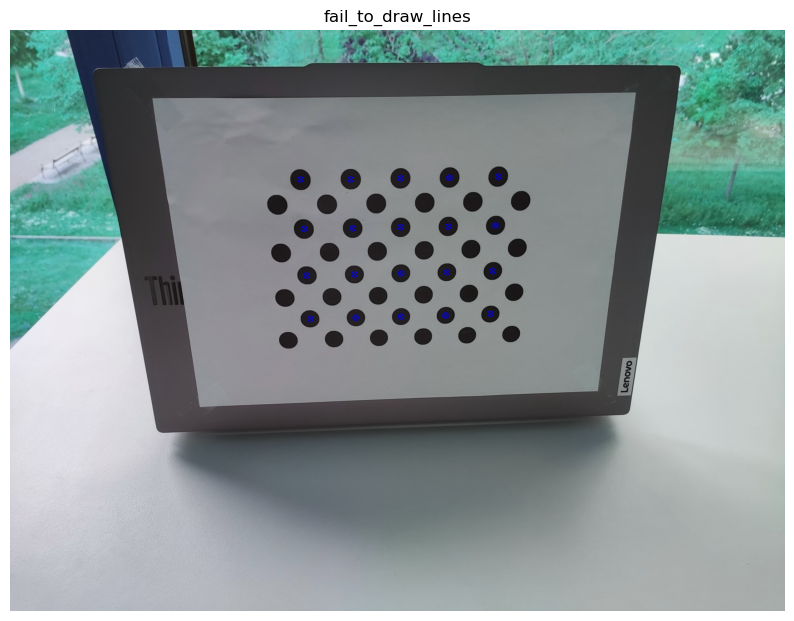

In [3]:
# I was still able to draw some conclusions during my attempt.
# The next code block shows an example from GitHub where the algorithm performs well.

# I printed the target pattern and took several photos, but the algorithm failed to detect it.
# I also tried resizing (scaling down) the photos, but that didn’t help either.
# Perhaps the image is too complex — there are too many circles. Fewer circles might work better.
# So, I eventually gave up on using my own photo.

# Conclusions:
# 1. The algorithm can detect circles in low-dimensional images.
# 2. However, limited information in low-dimensional data may lead to failures in connecting the circles correctly.
# 3. In my tests, using cv2.CALIB_CB_ASYMMETRIC_GRID alone works better than combining it with cv2.CALIB_CB_CLUSTERING.
# 4. Converting to grayscale does not improve the results.
# (In contrast, the second code block detects the pattern successfully.)


import cv2
import glob
import copy
import math
import numpy as np
import imageio
import os
import matplotlib.pyplot as plt
from pprint import pprint as pp


def display_image(image_np, title='Image'):
    """Displays a NumPy array image using Matplotlib."""
    if image_np is None:
        print("Cannot display None image.")
        return
    if image_np.ndim != 3 or image_np.shape[2] != 3:
        print(f"Image needs to be 3 channels (RGB) for display, but got shape {image_np.shape}")
        # Optionally try grayscale display:
        # plt.imshow(image_np, cmap='gray')
        return
    # Increased size slightly
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(image_np)
    ax.set_title(title)
    ax.axis('off')
    plt.show()

# code from Gemini 2.5 pro
## my image pattern  6 * 8
pattern_col = 6
pattern_row = 8

pattern_size = (pattern_col, pattern_row)

# my image circle size this argument is used to generate real coordinate
circle_spacing = 20

obj_points = [] # 3d point in real world space
img_points = [] # 2d points in image plane.
objp = np.zeros((pattern_col*pattern_row,3), np.float32)

# generate real world coordinates
for r in range(pattern_row):
    for c in range(pattern_col):
        idx = r*pattern_col + c
        objp[idx, 0] = (2*c + r%2) * circle_spacing
        objp[idx, 1] = r * circle_spacing
        objp[idx, 2] = 0

## code from lab1
assets_path = "Assets"
task_dir = "task3"
directory_path = os.path.join(assets_path, task_dir)
directory_files = os.listdir(directory_path)

# photo dimensions: 4000*3000, the algorithm cannot detect the patter, no dots show in CircleGridDetect
# test_file = "IMG_20250504_124935.jpg"

# original image dimensions: 1830 * 1330 the algorithm also cannot detect the patter, no dots show in CircleGridDetect
# test_file = "pattern_acircles.png"

# original image scale down, I found from this link: https://github.com/opencv/opencv/issues/24971, the image contains less circles and dimension is lower,
# so I try to scale down the image, dimensions: 1409 * 1024 the algorithm can detect circles but can not draw lines between them
# test_file = "imageedit_2_5546491182.png"
# I try to scale down my photo result dimensions: 1380 * 1035 the algorithm can also detect circles but can not draw lines between them
test_file = "IMG_20250504_125104_1380_1035.jpg"
#test_file = "IMG_20250504_125104_1067_800.jpg"
# test_file = "IMG_20250504_125104_800_600.jpg"
# test_file = "IMG_20250504_125104_667_500.jpg"
# test_file = "IMG_20250504_125104_267_200.jpg"

# set flag
# with my photos, cv2.CALIB_CB_ASYMMETRIC_GRID + cv2.CALIB_CB_CLUSTERING does not work well as cv2.CALIB_CB_ASYMMETRIC_GRID alone
# grid_flag = cv2.CALIB_CB_ASYMMETRIC_GRID + cv2.CALIB_CB_CLUSTERING
grid_flag = cv2.CALIB_CB_ASYMMETRIC_GRID
img = cv2.imread(os.path.join(directory_path, test_file))


# #  gray scale does not better for detection
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret, centers = cv2.findCirclesGrid(gray, pattern_size, flags=grid_flag)
# # debug code
# cv2.drawChessboardCorners(gray, pattern_size, centers, ret)
# print(ret)
# # Resize image to show within my screen
# imS = cv2.resize(gray, (960, 540))
# cv2.imshow("CircleGridDetect", imS)
# cv2.imwrite("CircleGridDetect1.png", imS)
# cv2.waitKey(0)

ret, centers = cv2.findCirclesGrid(img, pattern_size, flags=grid_flag)
# debug code
cv2.drawChessboardCorners(img, pattern_size, centers, ret)
print(ret)
display_image(img, "fail_to_draw_lines")
# cv2.imshow("CircleGridDetect", img)
# cv2.imwrite("CircleGridDetect1.png", img)
# cv2.waitKey(0)


True


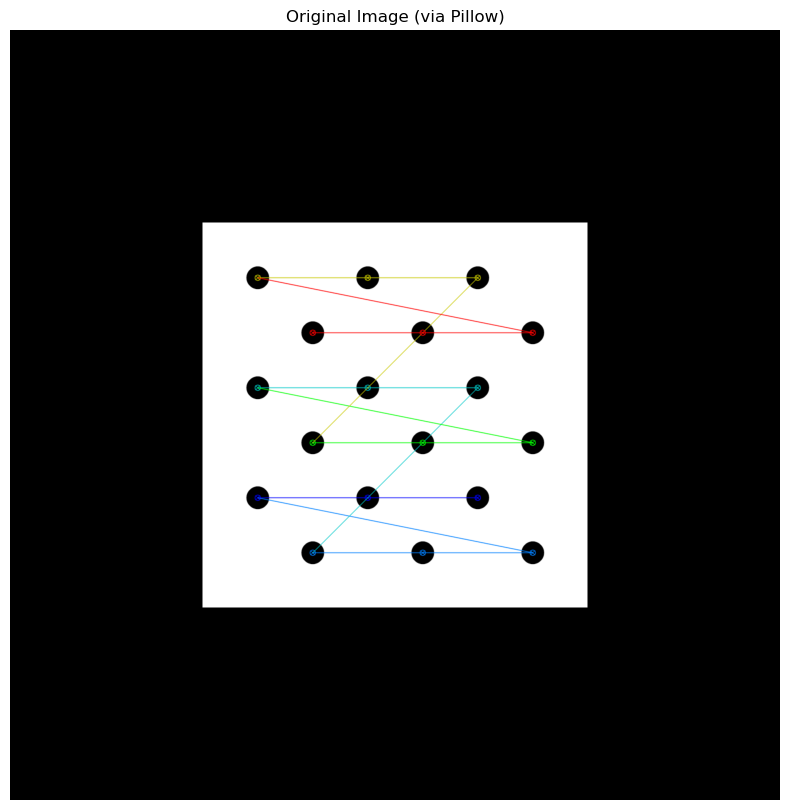

-1

In [12]:
# code from: https://github.com/opencv/opencv/issues/24971 also in this issue I found someone showed an alternative algorithm
import cv2 as cv


def display_image(image_np, title='Image'):
    """Displays a NumPy array image using Matplotlib."""
    if image_np is None:
        print("Cannot display None image.")
        return
    if image_np.ndim != 3 or image_np.shape[2] != 3:
        print(f"Image needs to be 3 channels (RGB) for display, but got shape {image_np.shape}")
        # Optionally try grayscale display:
        # plt.imshow(image_np, cmap='gray')
        return
    # Increased size slightly
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(image_np)
    ax.set_title(title)
    ax.axis('off')
    plt.show()

# my own path
assets_path = "Assets"
task_dir = "task3"
directory_path = os.path.join(assets_path, task_dir)
file_name = "aaa.png"
frame = cv2.imread(os.path.join(directory_path, file_name))

# using cv2.CALIB_CB_ASYMMETRIC_GRID alone performs better than combining it with cv2.CALIB_CB_CLUSTERING.
# grid_flag = cv2.CALIB_CB_ASYMMETRIC_GRID + cv2.CALIB_CB_CLUSTERING

grid_flag = cv2.CALIB_CB_ASYMMETRIC_GRID
circle_board_size = (3, 6)

# # gray does not work well
# gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# ret, circle_centers = cv2.findCirclesGrid(gray, pattern_size, flags=grid_flag)
# cv.drawChessboardCorners(frame, circle_board_size, circle_centers, ret)

ret, circle_centers = cv.findCirclesGrid(frame, circle_board_size, flags=grid_flag)
cv.drawChessboardCorners(frame, circle_board_size, circle_centers, ret)
## pop-up window
# print(ret)
# cv.imshow("CircleGridDetect", frame)
# cv.imwrite("CircleGridDetect1.png", frame)
# cv.waitKey(0)

display_image(frame, 'CircleGridDetect')

